## 

# Stock Apple

In [4]:
# Imporrt the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import yahoofinancials as yf
from yahoo_fin.stock_info import*
plt.style.use("fivethirtyeight")

In [5]:
history = yf.YahooFinancials('AAPL').get_historical_price_data('2012-01-01', '2022-01-01', 'daily')
df = pd.DataFrame(history['AAPL']['prices'])
df.head()

,date,high,low,open,close,volume,adjclose,formatted_date
0,1325601000,14.732143,14.607143,14.621429,14.686786,302220800,12.500193,2012-01-03
1,1325687400,14.810000,14.617143,14.642857,14.765714,260022000,12.567369,2012-01-04
2,1325773800,14.948214,14.738214,14.819643,14.929643,271269600,12.706892,2012-01-05
3,1325860200,15.098214,14.972143,14.991786,15.085714,318292800,12.839726,2012-01-06
4,1326119400,15.276786,15.048214,15.196429,15.061786,394024400,12.819361,2012-01-09


In [6]:
# Drop Date
df.drop('date', axis=1, inplace=True)

In [7]:
# Reset Index
df.index = pd.to_datetime(df['formatted_date'])
df.drop('formatted_date', axis=1, inplace=True)

**Let's change the name of the adjclose variable to 'Price'**

In [8]:
 df.rename(columns={'adjclose': 'price'}, inplace=True)

In [9]:
# Get the number rows and columns in the data set
df.shape

(2517, 6)

In [12]:
## Data infomation

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   high    2517 non-null   float64
 1   low     2517 non-null   float64
 2   open    2517 non-null   float64
 3   close   2517 non-null   float64
 4   volume  2517 non-null   int64  
 5   price   2517 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


<function matplotlib.pyplot.show(close=None, block=None)>

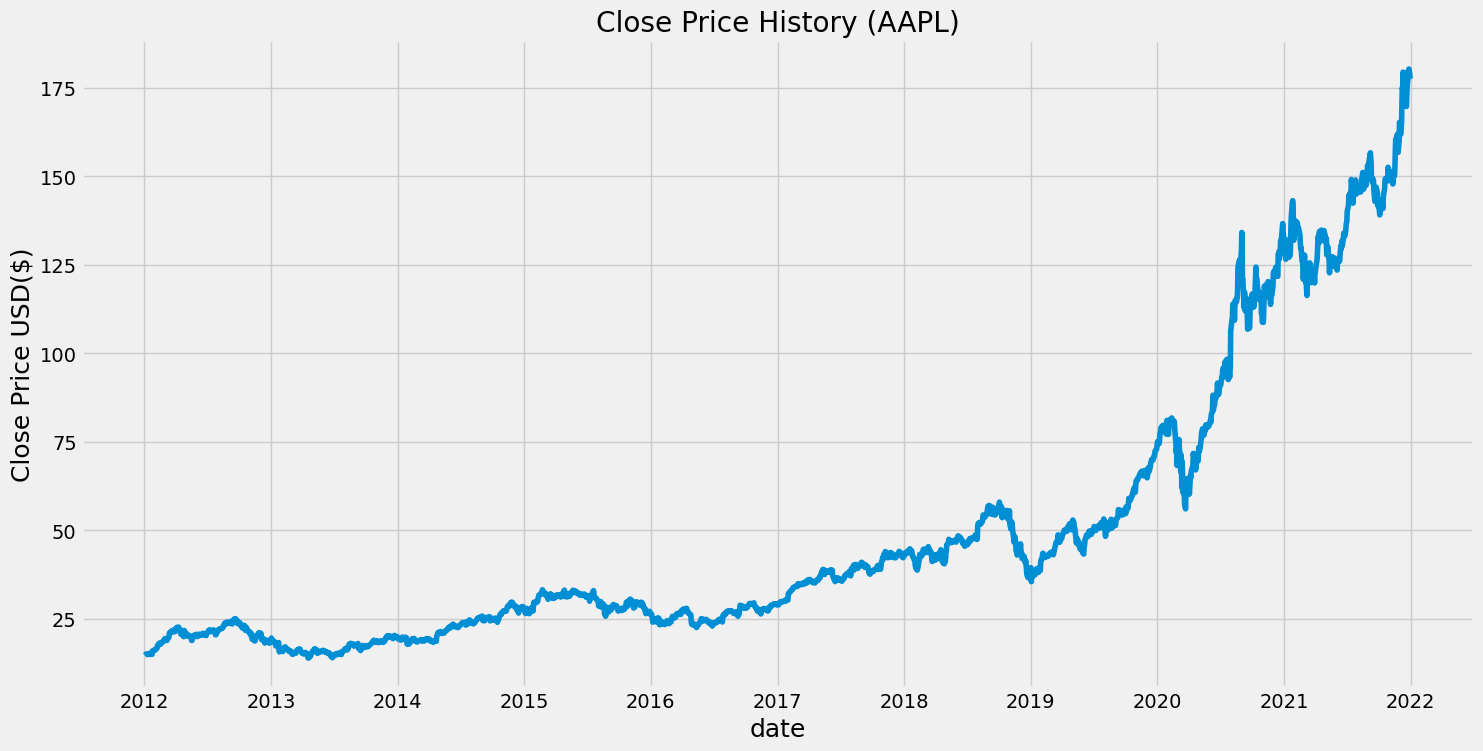

In [15]:
# Visualize the closing prince history
plt.figure(figsize=(16,8))
plt.title("Close Price History (AAPL)")
plt.plot(df["close"])
plt.xlabel("date",fontsize=18)
plt.ylabel("Close Price USD($)",fontsize=18)
plt.show

In [19]:
#Create a new dataframe with only the "Close column"
data=df.filter(['close'])
# Convert the Dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

2014

In [20]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00444329],
       [0.00491767],
       [0.00590292],
       ...,
       [0.99429028],
       [0.98719814],
       [0.98341175]])

In [21]:
# Create the training data set
# Create the scaled traing data set
train_data=scaled_data[0:training_data_len ,: ]
#Split the data into X _train and y_train data sets
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702125, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.00639018, 0.00791635, 0.00641379,
       0.0120484 , 0.01161266, 0.01218148, 0.01341144, 0.01415627,
       0.01409403, 0.01386435, 0.01484316, 0.01576401, 0.01680723,
       0.01849225, 0.02203185, 0.02208551, 0.02405602, 0.02552852,
       0.02299779, 0.0239723 , 0.02395298, 0.0266855 , 0.02629698,
       0.02701606, 0.02830826, 0.02902735, 0.03109874, 0.03260773,
       0.03304348, 0.03319588, 0.03061578, 0.02999328, 0.03008558,
       0.03251115, 0.03319374, 0.03465981, 0.0381157 , 0.04272642,
       0.04186352, 0.04186566, 0.04519921, 0.04624242, 0.04549971,
       0.04482142, 0.04411522, 0.04646135, 0.04807125, 0.04874525])]
[0.047079553022239484]

[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702125, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.0

In [22]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train), np.array(y_train)

In [23]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1954, 60, 1)

In [25]:
# Build the LTSM model
model =Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
#Compile the model 
model.compile(optimizer="adam",loss="mean_squared_error")

In [28]:
# Train the model
model.fit(x_train,y_train,batch_size=1, epochs=1)

1954/1954 [==============================] - 60s 31ms/step - loss: 1.0699e-04


In [29]:
#Create the testing data set 
#create a new array  containing scaled values from index 
test_data= scaled_data[training_data_len -60:,:]
#Create the data sets x_train and y_test:
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [32]:
# Convert the data to anumpy array
x_test=np.array(x_test)
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [33]:
#getthe models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 13ms/step


In [34]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse


3.0288018213351724

C:\Users\DeLL\AppData\Local\Temp\ipykernel_15556\2841876430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"]=predictions


<function matplotlib.pyplot.show(close=None, block=None)>

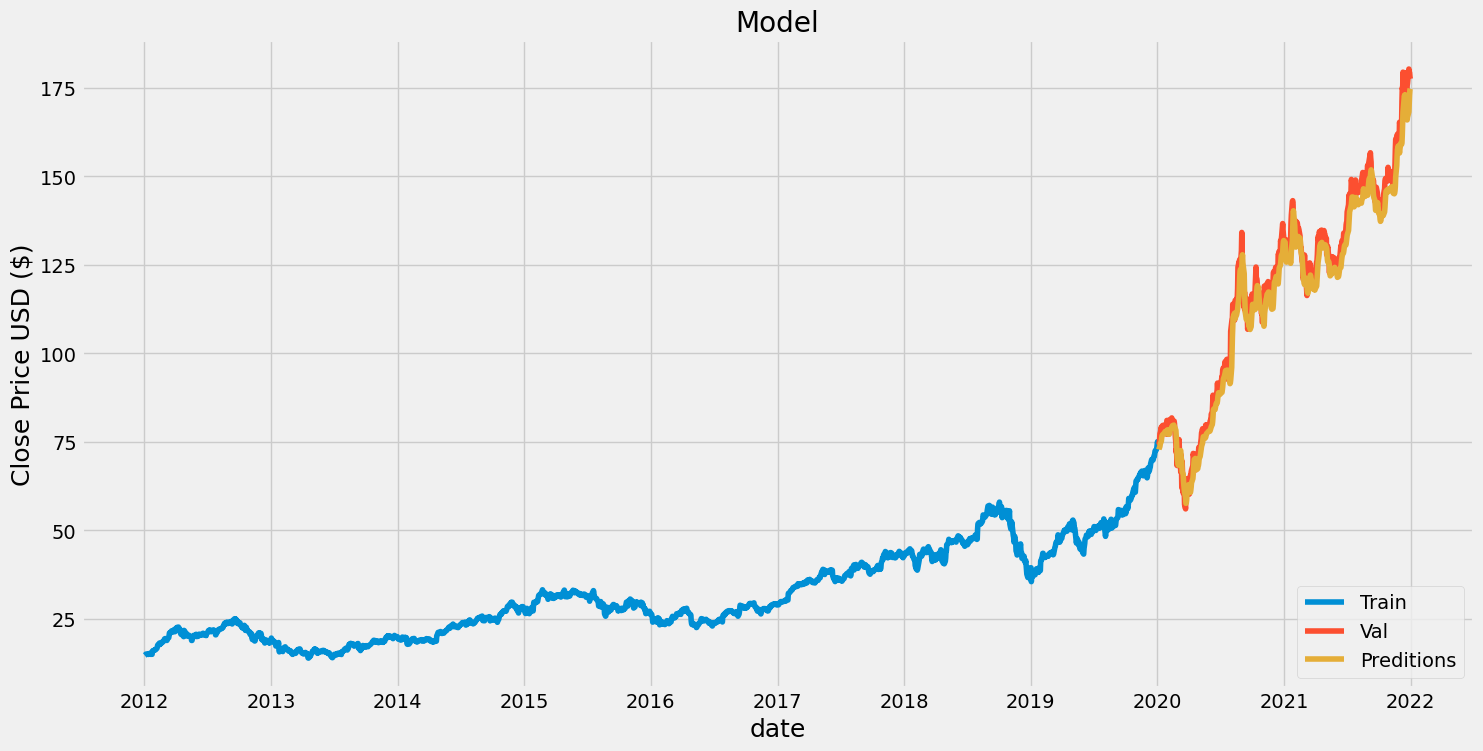

In [37]:
#Plot the data 
train=data[:training_data_len]
valid=data[training_data_len:]
valid["Predictions"]=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("date",fontsize=18)
plt.ylabel("Close Price USD ($)",fontsize=18)
plt.plot(train["close"])
plt.plot(valid[["close","Predictions"]])
plt.legend(["Train","Val","Preditions"],loc="lower right")
plt.show

In [48]:
from yahoofinancials import YahooFinancials

In [50]:
#Get the quote 
apple_quote=yf.YahooFinancials('AAPL').get_historical_price_data('2012-01-01', '2022-01-01', 'daily')
# Create a new dataframe
new_df=apple_quote.filter(["close"])
# Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#append teh past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test=np.array(X_test)
#Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price=model.predict(X_test)
# Undo the scaling 
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)

AttributeError: 'dict' object has no attribute 'filter'

In [ ]:
#get the quote 
apple_quote2= web.DataReader("AAPL",data_source="yahoo", start='2022-09-20',end='2022-09-20')
print(apple_quote2["Close"])

In [16]:
df.columns

Index(['high', 'low', 'open', 'close', 'volume', 'price'], dtype='object')